One layer Galton Board

In [1]:
import os

In [2]:
os.chdir("..")

In [3]:
print(os.getcwd())

/home/ismail/quantum_python/quantum_nnl_project


In [4]:
from src.galton_box import *

In [5]:
import matplotlib.pyplot as plt

{1: 514, 0: 486}


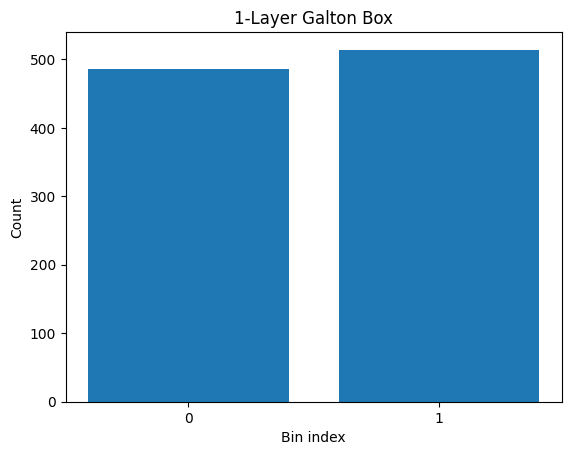

In [9]:
# One layer board
bin_counts = galton_one_layer()
print(bin_counts)
plt.bar(bin_counts.keys(), bin_counts.values())
plt.xlabel("Bin index")
plt.ylabel("Count")
plt.title("1-Layer Galton Box")
plt.xticks([0, 1])
plt.show()

Two layer Galton Board